Reading csv file

In [2]:
import pandas as pd
file_path = r'/content/RELIANCE.NS-historical-data .csv'
data = pd.read_csv(file_path)
close_price = data['Close']


Line Plot of 10 years of historical data

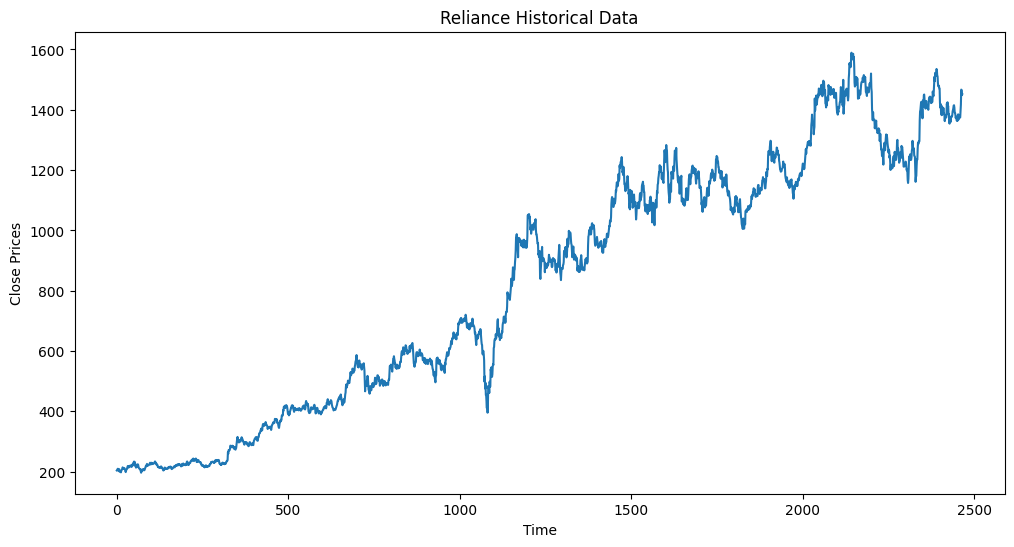

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(close_price)
plt.xlabel('Time')
plt.ylabel('Close Prices')
plt.title('Reliance Historical Data')
# plt.grid(True)
plt.show()

Dividing Training and Test data

In [5]:
import numpy as np

data_raw = close_price.values.reshape(-1, 1)

scaling_factor = np.max(data_raw)
data_normalized = data_raw / scaling_factor
# 80% train, 20% test
train_size = int(len(data_normalized) * 0.8)
train_data = data_normalized[:train_size]
test_data = data_normalized[train_size:]

print(f"Total data points: {len(data_raw)}")
print(f"Training data points: {len(train_data)}")
print(f"Testing data points: {len(test_data)}")

Total data points: 2466
Training data points: 1972
Testing data points: 494


Creating LSTM model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Function to create LSTM model
def create_lstm_model(units, activation, learning_rate):
    model = Sequential()

    model.add(LSTM(units=units, activation=activation, input_shape=(1, 1)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

LSTM tuning

In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

lstm_units = [50, 100]
lstm_activations = ['relu', 'tanh']
learning_rates = [0.001, 0.01]
epochs = 50  # Using 50 epochs for faster tuning
batch_size = 32

# Perform hyperparameter tuning
best_rmse = float('inf')
best_lstm_model = None
best_params = {}


X_train = train_data[:-1].reshape(-1, 1, 1)
y_train = train_data[1:]
X_test = test_data[:-1].reshape(-1, 1, 1)
y_test = test_data[1:]

print("starting LSTM hyperparameter tuning...")

for units in lstm_units:
    for activation in lstm_activations:
        for learning_rate in learning_rates:
            print(f"Tuning with: Units={units}, Activation={activation}, LR={learning_rate}")

            model = create_lstm_model(units=units, activation=activation, learning_rate=learning_rate)
            model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

            # Predict on test data
            test_predictions = model.predict(X_test).flatten()

            # Calculate RMSE
            rmse_val = np.sqrt(mean_squared_error(y_test, test_predictions))

            # Check if current model has lower RMSE
            if rmse_val < best_rmse:
                best_rmse = rmse_val
                best_lstm_model = model
                best_params = {'units': units, 'activation': activation, 'learning_rate': learning_rate}

print("\nLSTM Tuning Complete.")
print(f"Best Test RMSE (normalized): {best_rmse:.6f}")
print(f"Best Hyperparameters: {best_params}")

starting LSTM hyperparameter tuning...
Tuning with: Units=50, Activation=relu, LR=0.001


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Tuning with: Units=50, Activation=relu, LR=0.01


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Tuning with: Units=50, Activation=tanh, LR=0.001


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Tuning with: Units=50, Activation=tanh, LR=0.01


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Tuning with: Units=100, Activation=relu, LR=0.001


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Tuning with: Units=100, Activation=relu, LR=0.01


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Tuning with: Units=100, Activation=tanh, LR=0.001


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Tuning with: Units=100, Activation=tanh, LR=0.01


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

LSTM Tuning Complete.
Best Test RMSE (normalized): 0.015913
Best Hyperparameters: {'units': 100, 'activation': 'tanh', 'learning_rate': 0.001}


Creating SVM , Random Forest , LightGBM and XGBoost models

In [8]:
import numpy as np
X_ml = np.arange(len(close_price)).reshape(-1, 1)

y_ml = close_price.values

print(f"Prepared data for ML curve fitting with {len(X_ml)} samples.")

Prepared data for ML curve fitting with 2466 samples.


In [9]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

print("Tuning SVM...")
svm_model = SVR()
svm_params = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

svm_grid_search = GridSearchCV(svm_model, svm_params, scoring='neg_mean_squared_error', cv=3)
svm_grid_search.fit(X_ml, y_ml)
svm_best_model = svm_grid_search.best_estimator_
svm_predictions = svm_best_model.predict(X_ml)
print("SVM tuning complete.")

Tuning SVM...
SVM tuning complete.


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

print("Tuning Random Forest...")
rf_model = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}
rf_grid_search = GridSearchCV(rf_model, rf_params, scoring='neg_mean_squared_error', cv=3)
rf_grid_search.fit(X_ml, y_ml)
rf_best_model = rf_grid_search.best_estimator_
rf_predictions = rf_best_model.predict(X_ml)
print("Random Forest tuning complete.")

Tuning Random Forest...
Random Forest tuning complete.


In [11]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

print("Tuning XGBoost...")
xgb_model = XGBRegressor(random_state=42)
xgb_params = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7]
}
xgb_grid_search = GridSearchCV(xgb_model, xgb_params, scoring='neg_mean_squared_error', cv=3)
xgb_grid_search.fit(X_ml, y_ml)
xgb_best_model = xgb_grid_search.best_estimator_
xgb_predictions = xgb_best_model.predict(X_ml)
print("XGBoost tuning complete.")

Tuning XGBoost...
XGBoost tuning complete.


In [12]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

print("Tuning LightGBM...")
lgbm_model = LGBMRegressor(random_state=42, verbosity=-1)
lgbm_params = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7]
}
lgbm_grid_search = GridSearchCV(lgbm_model, lgbm_params, scoring='neg_mean_squared_error', cv=3)
lgbm_grid_search.fit(X_ml, y_ml)
lgbm_best_model = lgbm_grid_search.best_estimator_
lgbm_predictions = lgbm_best_model.predict(X_ml)
print("LightGBM tuning complete.")

Tuning LightGBM...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/v

LightGBM tuning complete.


Plotting the Actual vs Predicted Fit of respective best models .

ML Model Results (Curve Fitting)


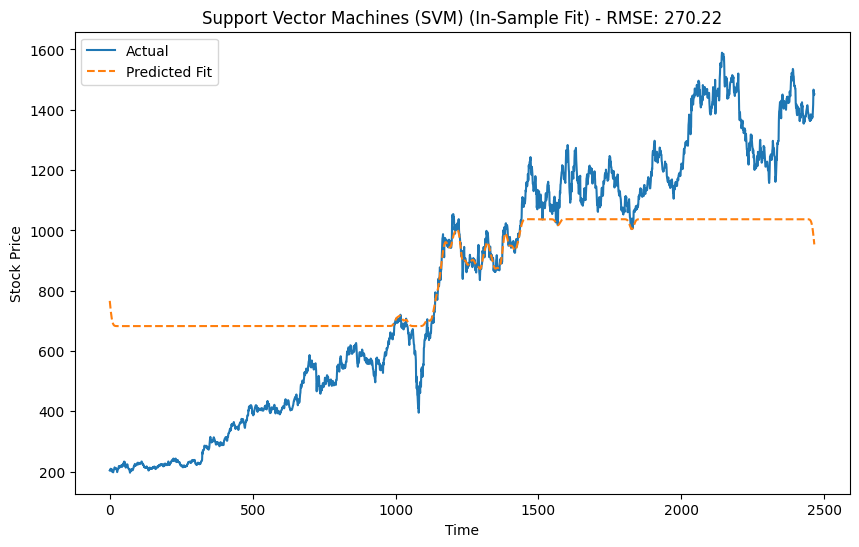

Best Hyperparameters for Support Vector Machines (SVM):
SVR(C=10, gamma=0.01)


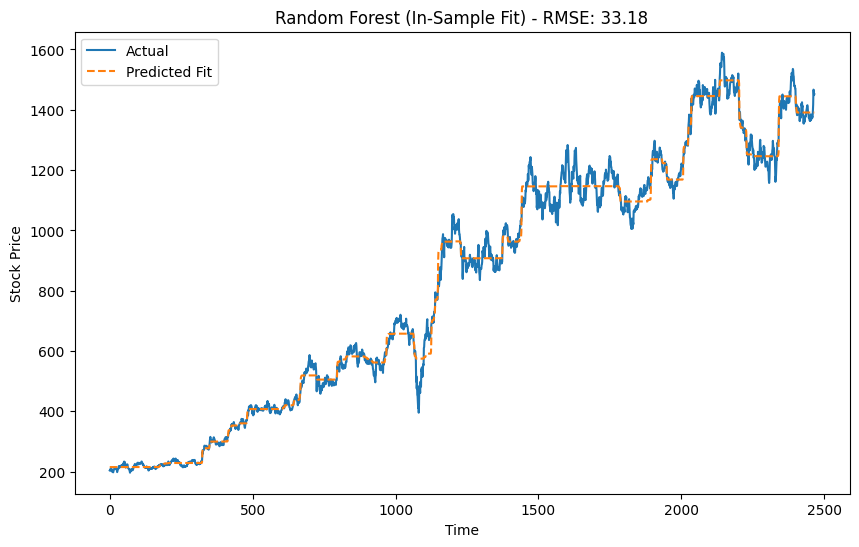

Best Hyperparameters for Random Forest:
RandomForestRegressor(max_depth=5, n_estimators=200, random_state=42)


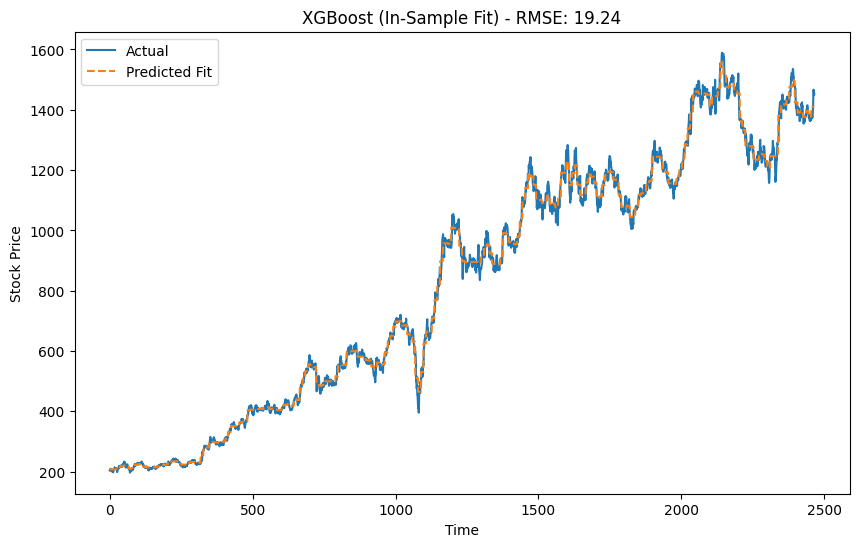

Best Hyperparameters for XGBoost:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)


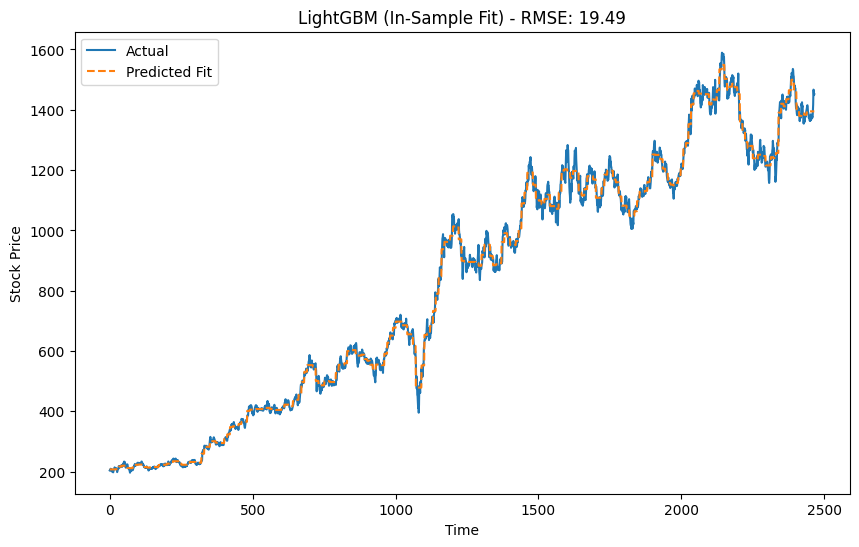

Best Hyperparameters for LightGBM:
LGBMRegressor(max_depth=7, random_state=42, verbosity=-1)


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# List of model names and predictions
model_names = ['Support Vector Machines (SVM)', 'Random Forest', 'XGBoost', 'LightGBM']
predictions = [svm_predictions, rf_predictions, xgb_predictions, lgbm_predictions]
best_models = [svm_best_model, rf_best_model, xgb_best_model, lgbm_best_model]

actual_values = close_price

# Evaluate models and plot graphs
print("ML Model Results (Curve Fitting)")
for i, model_name in enumerate(model_names):
    model_prediction = predictions[i]
    model_rmse = rmse(actual_values, model_prediction)

    # Plotting actual and predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(actual_values, label='Actual')
    plt.plot(model_prediction, label='Predicted Fit', linestyle='--')
    plt.title(f"{model_name} (In-Sample Fit) - RMSE: {model_rmse:.2f}")
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    # Print the best hyperparameters for the model
    print(f"Best Hyperparameters for {model_name}:")
    print(best_models[i])

LSTM Actual vs Predicted fit

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

LSTM Model Results (Time Series) 


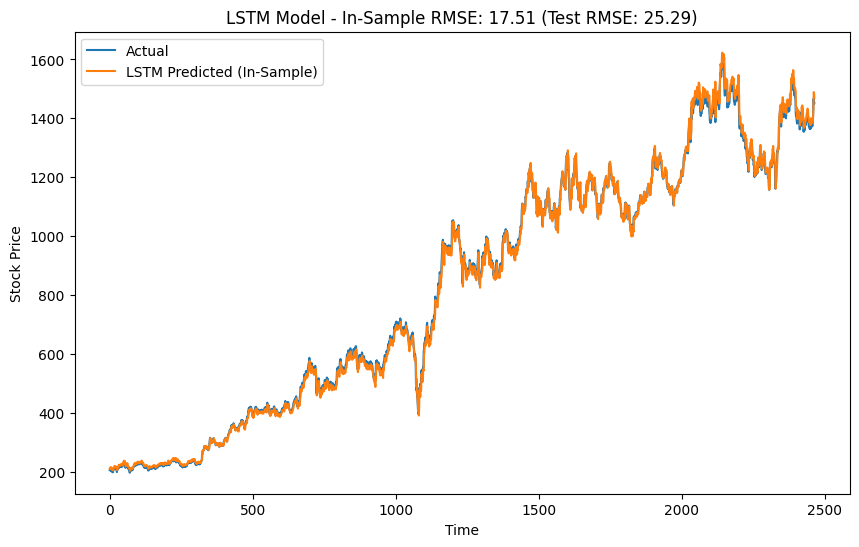

Best Test RMSE (scaled back to price): 25.29
Best Hyperparameters: {'units': 100, 'activation': 'tanh', 'learning_rate': 0.001}


In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error


X_all = data_normalized[:-1].reshape(-1, 1, 1)
all_lstm_predictions_normalized = best_lstm_model.predict(X_all).flatten()


all_lstm_predictions = all_lstm_predictions_normalized * scaling_factor


actual_values_lstm = data_raw[1:].flatten()


lstm_full_rmse = np.sqrt(mean_squared_error(actual_values_lstm, all_lstm_predictions))

print(f"\nLSTM Model Results (Time Series) ")
# Plotting LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(actual_values_lstm, label='Actual')
plt.plot(all_lstm_predictions, label='LSTM Predicted (In-Sample)')
# We also show the scaled Test RMSE, which is the more important metric
plt.title(f"LSTM Model - In-Sample RMSE: {lstm_full_rmse:.2f} (Test RMSE: {best_rmse*scaling_factor:.2f})")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

print(f"Best Test RMSE (scaled back to price): {best_rmse * scaling_factor:.2f}")
print(f"Best Hyperparameters: {best_params}")

Next 10 day predictions of LSTM model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


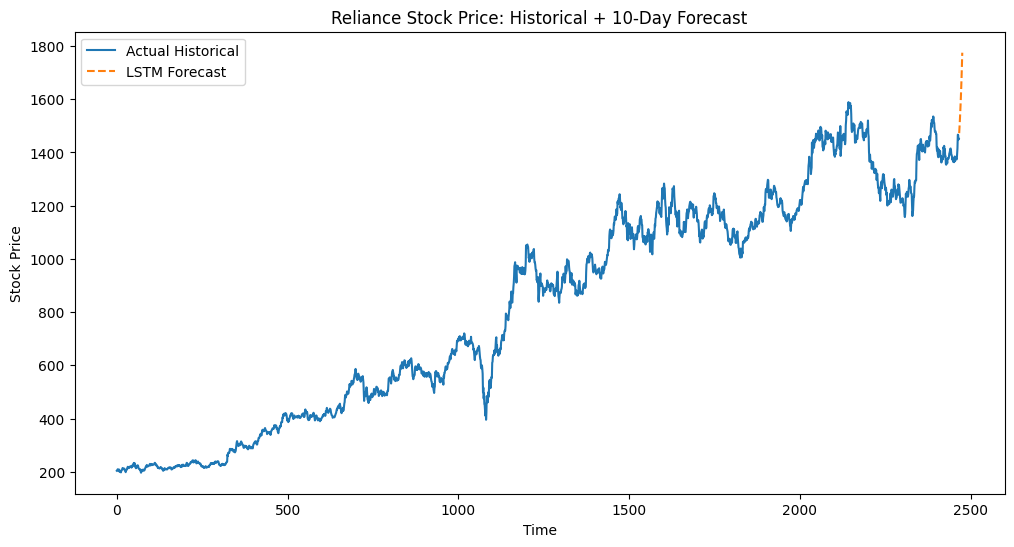


Predicted Reliance stock prices for the next 10 days:
Day 1: 1472.61
Day 2: 1495.42
Day 3: 1520.23
Day 4: 1547.28
Day 5: 1576.82
Day 6: 1609.17
Day 7: 1644.69
Day 8: 1683.79
Day 9: 1726.99
Day 10: 1774.85


In [18]:
import numpy as np
import matplotlib.pyplot as plt


def predict_future_lstm(model, data_norm, num_predictions, scale_factor):
    predictions = []


    last_data_point_normalized = data_norm[-1].reshape(1, 1, 1)

    for _ in range(num_predictions):

        prediction_normalized = model.predict(last_data_point_normalized)
        predictions.append(prediction_normalized[0, 0])
        last_data_point_normalized = prediction_normalized.reshape(1, 1, 1)

    predictions_scaled = np.array(predictions) * scale_factor
    return predictions_scaled

# Predict for next 10 days
num_predictions = 10
future_predictions = predict_future_lstm(best_lstm_model, data_normalized, num_predictions, scaling_factor)


last_day_index = len(close_price) - 1
future_index = np.arange(last_day_index + 1, last_day_index + 1 + num_predictions)

# Plot the historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(close_price, label='Actual Historical')
plt.plot(future_index, future_predictions, label='LSTM Forecast', linestyle='--')
plt.title(f"Reliance Stock Price: Historical + {num_predictions}-Day Forecast")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


print(f"\nPredicted Reliance stock prices for the next {num_predictions} days:")
for i, prediction in enumerate(future_predictions, start=1):
    print(f"Day {i}: {prediction:.2f}")